## Information: 
### 14.65 counts at a distance of 3 cm over a 100 day period

#### Counts data:

In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

#pip install lmfit
#import lmfit as lf
import scipy.optimize as opt

In [2]:
N= 0.0269 #neutrons per picobarn/microAmp/day 
DA= 4 #cm squared 
r= 10 #cm 

In [3]:
r=np.linspace(1,10,10) 
print (r)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
#all SA with r  
SA= 4*math.pi*r**2
print (SA)

[  12.56637061   50.26548246  113.09733553  201.06192983  314.15926536
  452.38934212  615.7521601   804.24771932 1017.87601976 1256.63706144]


In [5]:
#Fractrion of Neutrons hitting for all
F=(DA/SA)*100 
print(F)

[31.83098862  7.95774715  3.53677651  1.98943679  1.27323954  0.88419413
  0.64961201  0.4973592   0.39297517  0.31830989]


In [6]:
#Counts 
# Detection efficiency values (0% to 100%)
detection_efficiency = np.arange(0, 101, 10)

# Values
pb = 10
uA = 100
days = 100
factor_30 = 0.0269 * .30 * pb * uA * days
factor_3 = 0.0269 * .03 * pb * uA * days

# Calculate expected detected counts for 30% and 3% geometric coverage
counts_30 = factor_30 * detection_efficiency/100
counts_3 = factor_3 * detection_efficiency/100 
print(counts_30)
print(counts_3)

[  0.   80.7 161.4 242.1 322.8 403.5 484.2 564.9 645.6 726.3 807. ]
[ 0.    8.07 16.14 24.21 32.28 40.35 48.42 56.49 64.56 72.63 80.7 ]


In [7]:
#Factor depending on distance 
# Values
pb = 10
uA = 100
days = 100
factor= 0.0269 * (F/100) * pb * uA * days 
print(factor)

[856.25359383 214.06339846  95.1392882   53.51584961  34.25014375
  23.78482205  17.47456314  13.3789624   10.57103202   8.56253594]


In [8]:
#Counts with efficiency at .154 
counts=factor * .154 
print(counts)

[131.86305345  32.96576336  14.65145038   8.24144084   5.27452214
   3.6628626    2.69108272   2.06036021   1.62793893   1.31863053]


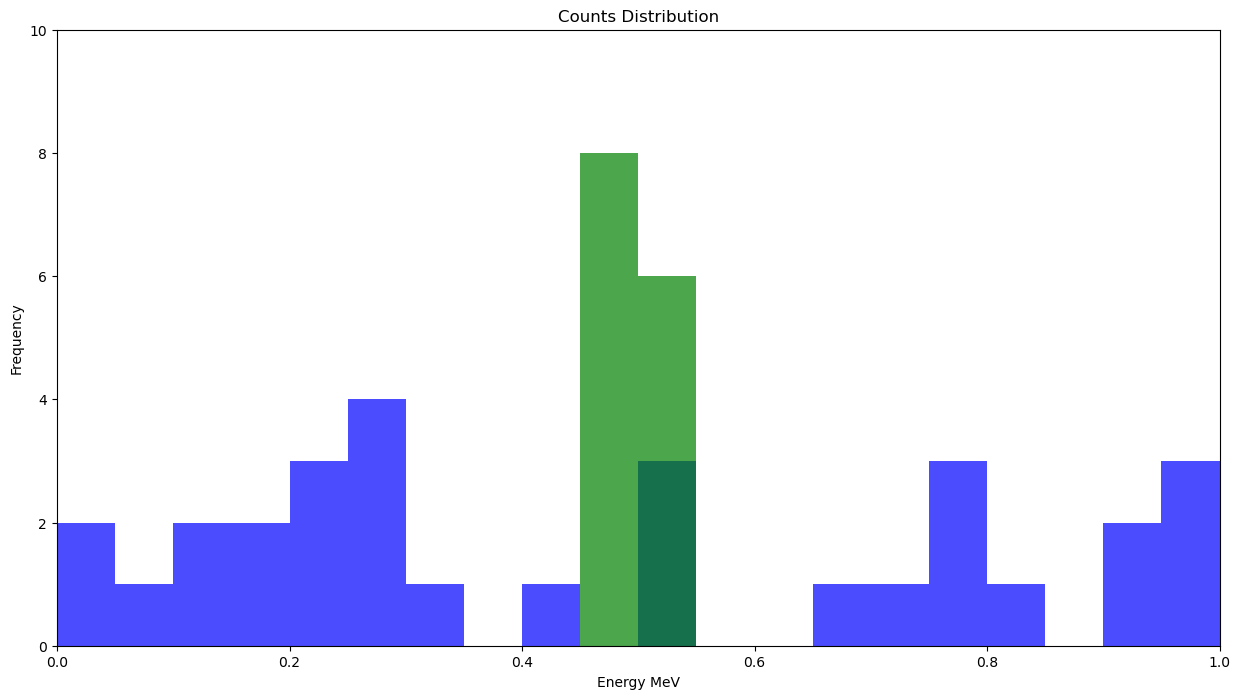

In [9]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
num_samples_2=30
num_samples= int(counts[2])

mean_energy = .5
std_deviation = .001
N=np.random.normal(mean_energy, std_deviation, num_samples) 

U= np.random.uniform(0, 1, num_samples_2) 

plt.hist(U, bins=20, range =(0,1) , color='blue', alpha=0.7)
plt.hist(N, bins=20, range =(0,1) , color='green', alpha=0.7) 

ymin =0
ymax = 10

ax1.set_xlim(0, 1) 
ax1.set_ylim(ymin,ymax)
 
plt.title('Counts Distribution')
plt.xlabel('Energy MeV')
plt.ylabel('Frequency') 

plt.show()

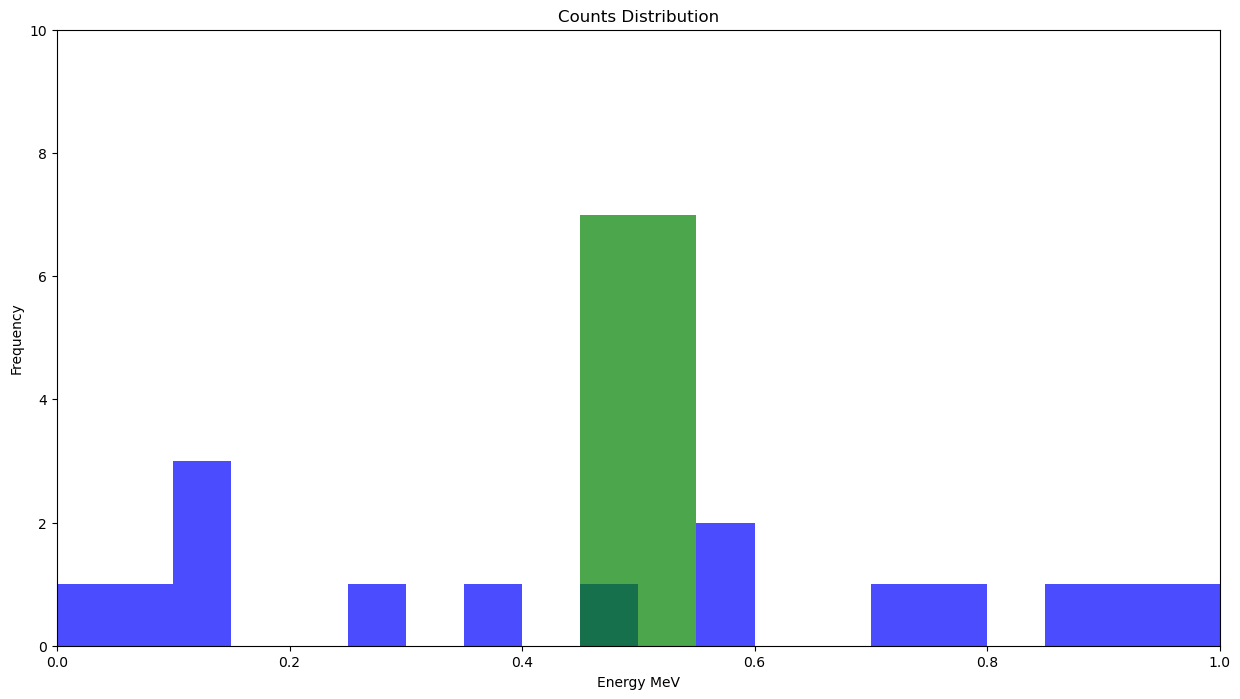

In [10]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
num_samples_2=15
num_samples= int(counts[2])

mean_energy = .5
std_deviation = .001
N=np.random.normal(mean_energy, std_deviation, num_samples) 

U= np.random.uniform(0, 1, num_samples_2) 

plt.hist(U, bins=20, range =(0,1) , color='blue', alpha=0.7)
plt.hist(N, bins=20, range =(0,1) , color='green', alpha=0.7) 

ymin =0
ymax = 10

ax1.set_xlim(0, 1) 
ax1.set_ylim(ymin,ymax)
 
plt.title('Counts Distribution')
plt.xlabel('Energy MeV')
plt.ylabel('Frequency') 

plt.show()

Questions: 
Do I need Noise? 
Do I need a function? 
what is fmt? 


In [11]:
xdata = np.random.uniform(0, 1, num_samples_2)        
ydata = np.random.normal(mean_energy, std_deviation, num_samples)              
noise = np.random.normal(0,1,len(xdata))  

for i,n in enumerate(xdata):                #Redefine y-data to be:
    ydata[i] = n**2+noise[i]                #x^2 plus some noise.
sigdata = np.ones(len(xdata))               #Sigma is 1 since that's the width of the noise distribution

#Function
def f(x,a,b,c):          #Independent variable must be listed first in this line for scipy to know how to fit it.
    return a*x**2+b*x+c  #In python, anything unset must be listed as a variable in the function, including the parameters we fit for.

#Points representing function - this is necessary to plot f(x) for our comparison.
ycurve = xdata**2 

IndexError: index 14 is out of bounds for axis 0 with size 14

In [ ]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))  #size of the plot -- helps make it more visible

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data') #Plot the fake data we generated.
#Plot them as points (fmt='*o'; the * corresponds to color) with error bars
plt.plot(xdata,ycurve,label='Function')                      #Plot the function we created.
#Accepting default style gives us a solid line

plt.legend()           #Tells our plot to show a legend
plt.show()             #Depending how your environment is set up, this line may not be necessary, but it won't break anything.